<a href="https://colab.research.google.com/github/Ishi110/Data-Analysis-Using-Python/blob/main/CovidDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
file1= '/content/drive/MyDrive/CovidData.xlsx'
df1=pd.read_excel(file1)
d1=pd.DataFrame(df1)
#Displaying first few rows
print(d1.head())
#Identifying dimension of dataset and data types of each column
print('dimension of the dataset-',d1.shape,'\n',
      'datatype of the dateset-',d1.dtypes)

Mounted at /content/drive
   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE            DATE_DIED  INTUBED  \
0      2             1    1             1  2020-03-05 00:00:00       97   
1      2             1    2             1  2020-03-06 00:00:00       97   
2      2             1    2             2  2020-09-06 00:00:00        1   
3      2             1    1             1  2020-12-06 00:00:00       97   
4      2             1    2             1           21/06/2020       97   

   PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
0          1   65         2         2  ...       2        2             1   
1          1   72        97         2  ...       2        2             1   
2          2   55        97         1  ...       2        2             2   
3          2   53         2         2  ...       2        2             2   
4          2   68        97         1  ...       2        2             1   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TO

In [2]:
#CHECKING FOR MISSING VALUES
#set as 97 and 98
missing_values = [97, 99]
df1.replace(missing_values, np.nan, inplace=True)
missing_count = df1.isnull().sum()
missing_count_with_index = missing_count[missing_count > 0]
print('missing values-',missing_count,missing_count_with_index)

#Dropping rows with Nan values
drop1=df1.dropna(thresh=18,inplace=True,axis=0)
#checking the new dimensions
print('new dimension-',df1.shape)

missing values- USMER                      0
MEDICAL_UNIT               0
SEX                        0
PATIENT_TYPE               0
DATE_DIED                  0
INTUBED                  605
PNEUMONIA                 20
AGE                        3
PREGNANT                1188
DIABETES                   0
COPD                       0
ASTHMA                     0
INMSUPR                    0
HIPERTENSION               0
OTHER_DISEASE              0
CARDIOVASCULAR             0
OBESITY                    0
RENAL_CHRONIC              0
TOBACCO                    0
CLASIFFICATION_FINAL       0
ICU                      605
dtype: int64 INTUBED       605
PNEUMONIA      20
AGE             3
PREGNANT     1188
ICU           605
dtype: int64
new dimension- (1992, 21)


In [3]:
#dropping irrelevent columns
columns_to_drop = ['USMER', 'MEDICAL_UNIT']
df1.drop(columns_to_drop, axis=1, inplace=True)
#checking the new dimensions
print('new dimension-',df1.shape)


new dimension- (1992, 19)


In [4]:
#Using NumPy to perform numerical operations on the dataset, such as calculating
#mean, median, standard deviation, etc.
age_array=np.array(df1['AGE'])
print('mean_age',np.nanmean(age_array))
print('median_age',np.nanmedian(age_array))
print('std_age',np.nanstd(age_array))


mean_age 56.177386934673365
median_age 58.0
std_age 19.17539229204449


In [5]:
#Grouping data and calculating aggregate statistics:
# Grouping data by 'classification' and calculate the mean age for each group
grouped = df1.groupby('CLASIFFICATION_FINAL')['AGE'].mean()
print('grouping by classification and taking mean of age',grouped)

# Calculating the total count of patients for each 'classification'
count_by_classification = df1['CLASIFFICATION_FINAL'].value_counts(ascending=True)
print('count of patients for each classification',count_by_classification)

#Filtering the dataset based on specific conditions:
# Filtering the dataset to include only female patients
female_patients = df1[df1['SEX'] == 1]
print('female patients-','\n',female_patients)

# Filtering the dataset to include only patients with diabetes and hypertension
diabetes_hypertension_patients = df1[(df1['DIABETES'] == 1) & (df1['HIPERTENSION'] == 1)]
print('patients with diabetes and hypertension','\n',diabetes_hypertension_patients)

# Sorting the dataset by age in descending order
sorted_by_age = df1.sort_values('AGE', ascending=False)
print('sorting data by age','\n',sorted_by_age)

# Ranking the patients based on their age in ascending order
df1['age_rank'] = df1['AGE'].rank(ascending=True)
print('ranking patients in ascending age','\n',df1)


grouping by classification and taking mean of age CLASIFFICATION_FINAL
1    44.241071
2    60.958333
3    60.104762
4    57.228571
5    56.166667
6    47.107143
7    48.520000
Name: AGE, dtype: float64
count of patients for each classification CLASIFFICATION_FINAL
2      24
4      35
6      57
5      78
1     112
7     426
3    1260
Name: count, dtype: int64
female patients- 
       SEX  PATIENT_TYPE            DATE_DIED  INTUBED  PNEUMONIA   AGE  \
0       1             1  2020-03-05 00:00:00      NaN        1.0  65.0   
3       1             1  2020-12-06 00:00:00      NaN        2.0  53.0   
5       1             2           9999-99-99      2.0        1.0  40.0   
6       1             1           9999-99-99      NaN        2.0  64.0   
7       1             1           9999-99-99      NaN        1.0  64.0   
...   ...           ...                  ...      ...        ...   ...   
1990    1             1           9999-99-99      NaN        1.0  53.0   
1992    1             1     

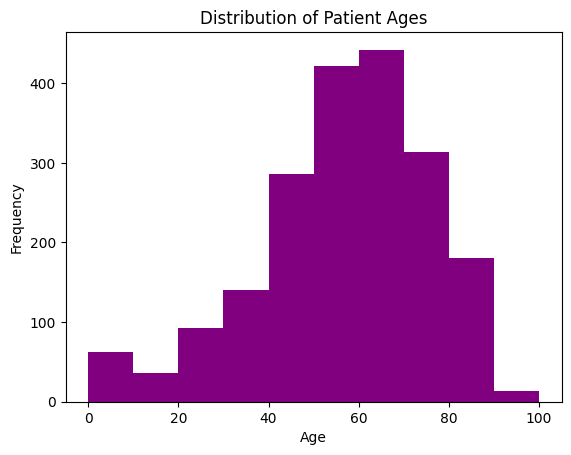

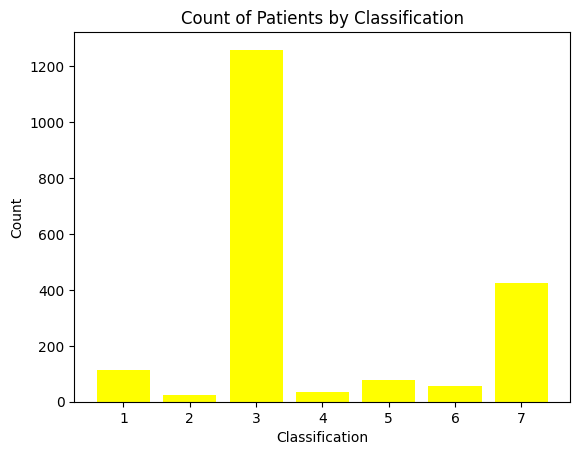

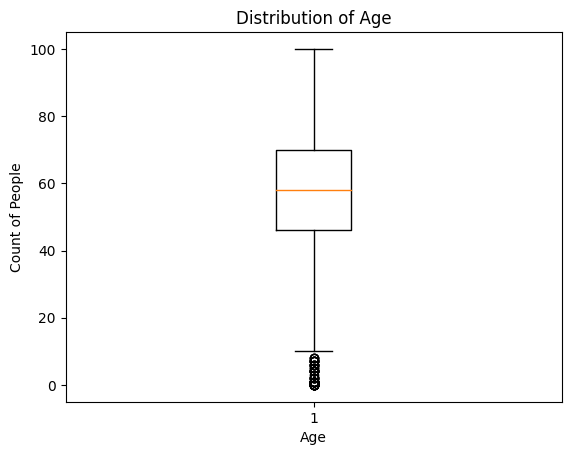

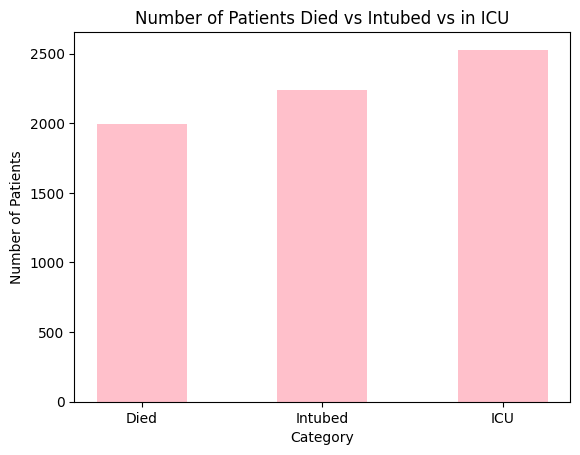

In [7]:
# Utilizing the Matplotlib library, which integrates well with both NumPy and
# Pandas, to create visualizations of  data.


import matplotlib.pyplot as plt


# Creating a histogram of patient ages
plt.hist(df1['AGE'], bins=10,color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Ages')
plt.show()

#ploting the count of patients for each 'classification'
# Creating a bar chart
plt.bar(count_by_classification.index, count_by_classification.values,color='yellow')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Count of Patients by Classification')
plt.show()




#Creating a box plot of patient ages with outliers
df_cleaned = df1.dropna(subset=['AGE'])
ages = df_cleaned['AGE']

# Creating a box plot
plt.boxplot(ages)
plt.xlabel('Age')
plt.ylabel('Count of People')
plt.title('Distribution of Age')

plt.show()

# bar chart comparing the number of patients who died,
#were intubated, and were in the ICU

num_died = df1['DATE_DIED'].notnull().sum()
num_intubed = df1['INTUBED'].sum()
num_icu = df1['ICU'].sum()


categories = ['Died', 'Intubed', 'ICU']
counts = [num_died, num_intubed, num_icu]

plt.bar(categories, counts,width=0.5,color='pink')
plt.xlabel('Category')
plt.ylabel('Number of Patients')
plt.title('Number of Patients Died vs Intubed vs in ICU')
plt.show()


In [6]:
#MORE INSIGHTS
#Total Number of Patients by Gender
gender_counts = df1['SEX'].value_counts()
print("Total Number of Patients by Gender:\n", gender_counts)

#Percentage of Patients with Comorbidities
comorbidity_columns = ['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY']
comorbidity_percentage = (df1[comorbidity_columns].sum() / len(df1)) * 100
print("Percentage of Patients with Comorbidities:\n", comorbidity_percentage)

#Mortality Rate by Age Group
age_groups = pd.cut(df1['AGE'], bins=[0, 18, 40, 60, np.inf], labels=['0-18', '19-40', '41-60', '61+'])
mortality_rate_by_age = df1.groupby(age_groups)['CLASIFFICATION_FINAL'].mean() * 100
print("Mortality Rate by Age Group:\n", mortality_rate_by_age)

#Percentage of Pregnant Patients
pregnant_percentage = (df1['PREGNANT'] == 1).mean() * 100
print("Percentage of Pregnant Patients:", pregnant_percentage)

#Recovery Rate
recovery_rate = (df1['PATIENT_TYPE'] == 1).mean() * 100
print("Recovery Rate:", recovery_rate)

#Hospitalization Rate by Pre-existing Condition
conditions = ['DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY', 'RENAL_CHRONIC']
hospitalization_rate_by_condition = df1.groupby(conditions)['PATIENT_TYPE'].mean() * 100
print("Hospitalization Rate by Pre-existing Condition:\n", hospitalization_rate_by_condition)

#Average Age of Intubated Patients
average_age_intubated = df1.loc[df1['INTUBED'] == 1, 'AGE'].mean()
print("Average Age of Intubated Patients:", average_age_intubated)

Total Number of Patients by Gender:
 SEX
2    1180
1     812
Name: count, dtype: int64
Percentage of Patients with Comorbidities:
 DIABETES        211.345382
COPD            240.160643
ASTHMA          241.315261
HIPERTENSION    211.696787
OBESITY         208.785141
dtype: float64
Mortality Rate by Age Group:
 AGE
0-18     584.883721
19-40    432.941176
41-60    362.312925
61+      382.261641
Name: CLASIFFICATION_FINAL, dtype: float64
Percentage of Pregnant Patients: 0.25100401606425704
Recovery Rate: 25.451807228915662
Hospitalization Rate by Pre-existing Condition:
 DIABETES  COPD  ASTHMA  HIPERTENSION  OBESITY  RENAL_CHRONIC
1         1     2       1             1        1                175.000000
                                               2                188.888889
                                      2        1                175.000000
                                               2                200.000000
                        2             1        2                1